## Parent Satisfaction Classification problem


Based on the students details we predict the parent satisfaction classification yes or no. In here we handle class imbalance problem. Its binary classification problem. In this notebook we did these following steps. 

### 1. Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2. Loading Datasets

In [2]:
# Load the datasets
file = "datasets/xAPI-Edu-Data.csv"
df = pd.read_csv(file)

### 3. Explore Datasets

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [5]:
df.shape

(480, 17)

In [6]:
# Checking missing values
df.isna().sum().sum()

0

### 4. EDA

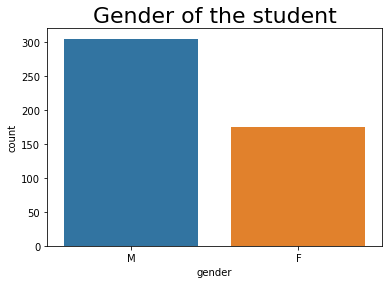

In [7]:
plt.title('Gender of the student', fontsize=22)
sns.countplot(x=df.gender);




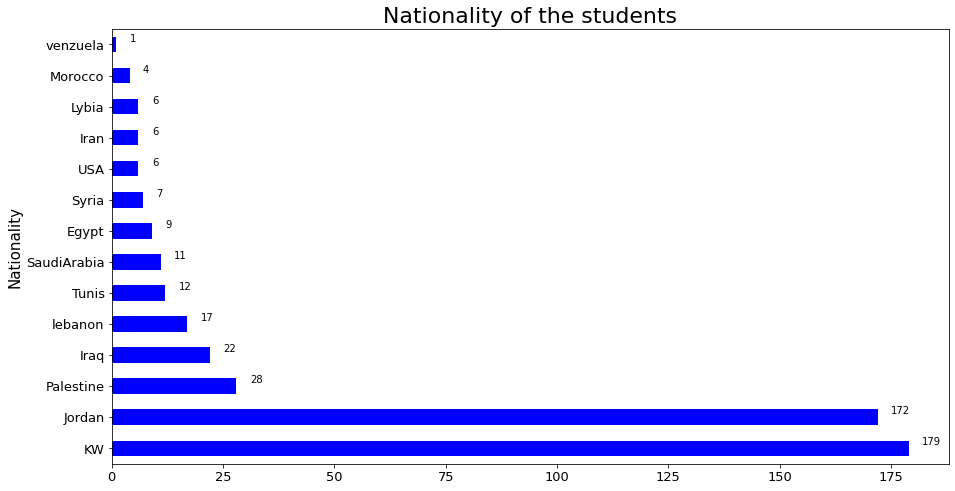

In [8]:
bar = df['NationalITy'].value_counts().sort_values(ascending=False)
ax = bar.plot(kind='barh', figsize=(15,8), color="blue", fontsize=13);
ax.set_alpha(0.5)
ax.set_title("Nationality of the students", fontsize=22)
ax.set_ylabel("Nationality", fontsize=15);
for i, v in enumerate(bar):
    ax.text(v + 3, i + .10, str(v))
plt.show()

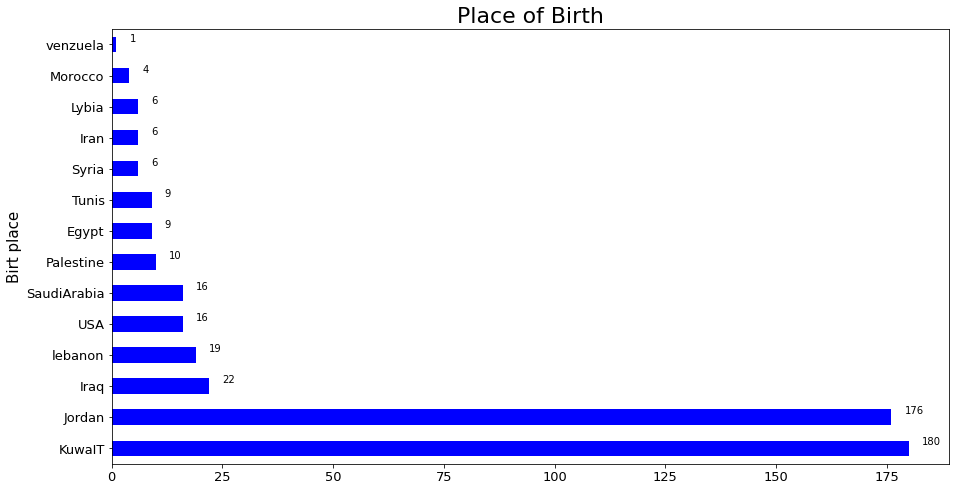

In [9]:
bar = df['PlaceofBirth'].value_counts().sort_values(ascending=False)
ax = bar.plot(kind='barh', figsize=(15,8), color="blue", fontsize=13);
ax.set_alpha(0.5)
ax.set_title("Place of Birth", fontsize=22)
ax.set_ylabel("Birt place", fontsize=15);
for i, v in enumerate(bar):
    ax.text(v + 3, i + .10, str(v))
plt.show()

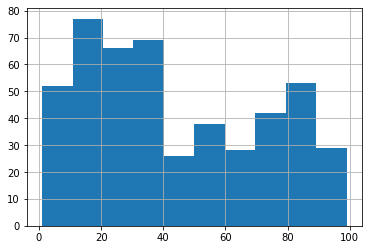

In [10]:
df['Discussion'].hist();

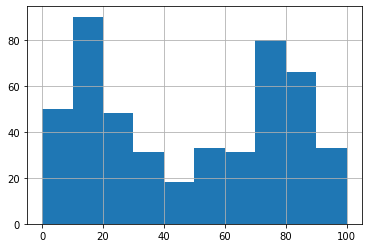

In [11]:
df['raisedhands'].hist();

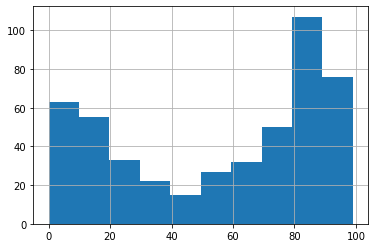

In [12]:
df['VisITedResources'].hist();

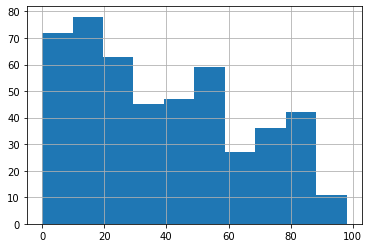

In [13]:
df['AnnouncementsView'].hist();

In [14]:
df['ParentschoolSatisfaction'].value_counts(normalize=True)

Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64

In [15]:
df['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [16]:
# label 0 and 1
df['ParentschoolSatisfaction'].replace(['Bad','Good'],[1, 0],inplace=True)

### 5. Input and Target Columns

In [17]:
# Sperate the data, features and label
features_df = df.drop('ParentschoolSatisfaction', axis='columns')
labels_df = df.ParentschoolSatisfaction

In [18]:
#sample data for our pridict purpose
sample_data = features_df.sample(1)

### 6. Encode categorical columns to one-hot vectors

In [19]:
# Encoder
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['raisedhands' 'VisITedResources' 'AnnouncementsView' 'Discussion']


In [20]:
categori_cols = features_df.columns[features_df.dtypes == "object"].values
print(categori_cols)

['gender' 'NationalITy' 'PlaceofBirth' 'StageID' 'GradeID' 'SectionID'
 'Topic' 'Semester' 'Relation' 'ParentAnsweringSurvey'
 'StudentAbsenceDays' 'Class']


In [21]:
features_df[categori_cols].nunique()

gender                    2
NationalITy              14
PlaceofBirth             14
StageID                   3
GradeID                  10
SectionID                 3
Topic                    12
Semester                  2
Relation                  2
ParentAnsweringSurvey     2
StudentAbsenceDays        2
Class                     3
dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(features_df[categori_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [23]:
encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['Egypt', 'Iran', 'Iraq', 'Jordan', 'KW', 'Lybia', 'Morocco',
        'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA', 'lebanon',
        'venzuela'], dtype=object),
 array(['Egypt', 'Iran', 'Iraq', 'Jordan', 'KuwaIT', 'Lybia', 'Morocco',
        'Palestine', 'SaudiArabia', 'Syria', 'Tunis', 'USA', 'lebanon',
        'venzuela'], dtype=object),
 array(['HighSchool', 'MiddleSchool', 'lowerlevel'], dtype=object),
 array(['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10',
        'G-11', 'G-12'], dtype=object),
 array(['A', 'B', 'C'], dtype=object),
 array(['Arabic', 'Biology', 'Chemistry', 'English', 'French', 'Geology',
        'History', 'IT', 'Math', 'Quran', 'Science', 'Spanish'],
       dtype=object),
 array(['F', 'S'], dtype=object),
 array(['Father', 'Mum'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Above-7', 'Under-7'], dtype=object),
 array(['H', 'L', 'M'], dtype=object)]

In [24]:
encoded_cols = list(encoder.get_feature_names(categori_cols))
print(encoded_cols)

['gender_F', 'gender_M', 'NationalITy_Egypt', 'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco', 'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel', 'GradeID_G-02', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06', 'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10', 'GradeID_G-11', 'GradeID_G-12', 'SectionID_A', 'SectionID_B', 'SectionID_C', 'Topic_Arabic', 'Topic_Biology', 'Topic_Chemistry', 'Topic_English', 'Topi

In [25]:
features_df[encoded_cols] = encoder.transform(features_df[categori_cols])

In [26]:
features_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,...,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
features_df.shape

(480, 85)

### 7. Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, stratify = labels_df, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)

(384, 85)
(96, 85)


In [30]:
y_train.value_counts(normalize=True)

0    0.609375
1    0.390625
Name: ParentschoolSatisfaction, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

0    0.604167
1    0.395833
Name: ParentschoolSatisfaction, dtype: float64

In [32]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes('category').columns.tolist()

In [33]:
X_train = X_train[numeric_cols]
X_test = X_test[numeric_cols]

### 8. Model training

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [35]:
# Random forrest
model = RandomForestClassifier(random_state = 22, max_depth = 5, class_weight='balanced')
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [36]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)


print(f"Train Accuracy = {train_acc} ")
print(f"Test Accuracy = {test_acc} ")

Train Accuracy = 0.8828125 
Test Accuracy = 0.84375 


In [37]:
print(classification_report(y_train, train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       234
           1       0.86      0.83      0.85       150

    accuracy                           0.88       384
   macro avg       0.88      0.87      0.88       384
weighted avg       0.88      0.88      0.88       384



In [38]:
print(classification_report(y_test, test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        58
           1       0.83      0.76      0.79        38

    accuracy                           0.84        96
   macro avg       0.84      0.83      0.83        96
weighted avg       0.84      0.84      0.84        96



In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, test_pred)
print(cm)
accuracy_score(y_test, test_pred)

[[52  6]
 [ 9 29]]


0.84375

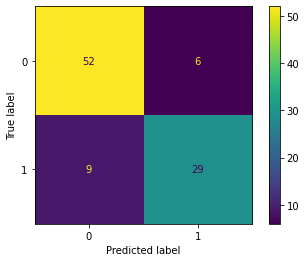

In [40]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

### 9. Model Store

In [41]:
import pickle
filename = 'saved_model/parent_satisfiction_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### 10. Model load and pridict the value

In [42]:
# load the model from disk
train_model = pickle.load(open(filename, 'rb'))

In [43]:
from sklearn.preprocessing import OneHotEncoder

def predict_the_result(input_data, model_name):
    
    """ Predict the result based on the input values"""
    numeric_cols = input_data.columns[input_data.dtypes != "object"].values
    categori_cols = input_data.columns[input_data.dtypes == "object"].values
    
    
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoder.fit(features_df[categori_cols])
    
    encoded_cols = list(encoder.get_feature_names(categori_cols))
    input_data[encoded_cols] = encoder.transform(input_data[categori_cols])
    
    numeric_cols = input_data.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = input_data.select_dtypes('category').columns.tolist()
    
    input_data = input_data[numeric_cols]
    
    return model_name.predict(input_data)

In [44]:
sample_data

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,StudentAbsenceDays,Class
280,M,Iraq,Iraq,MiddleSchool,G-06,A,English,F,Mum,74,71,56,37,No,Under-7,H


In [45]:
predict_the_result(sample_data, train_model)

array([0])